# Rishabh Agrawal
# DS 5500: Assignment 1

# Libraries

In [53]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from sklearn.utils import shuffle
import sklearn.linear_model as Lm
from sklearn.linear_model import LinearRegression as Lr
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pycountry_convert as pc


# Problem 1

I got 35% in the test. I was really suprised by it.

Q : In the last 20 years the proportion of people living in extreme poverty worldwide, has...?


Ans : Almost halved


In [2]:
poverty = pd.read_csv("dataset/ddf--datapoints--alternative_poverty_percent_below_nationally_defined_poverty--by--geo--time.csv")

In [12]:
before20Years = poverty[poverty['time'] <= 1999]
now = poverty[poverty['time']>1999]
a = before20Years['alternative_poverty_percent_below_nationally_defined_poverty'].mean()
b = now['alternative_poverty_percent_below_nationally_defined_poverty'].mean()
print("Mean of proportion of people living in poverty Before 20 Years : ", a)
print("Mean of proportion of people living in poverty Now : ", b)

Mean of proportion of people living in poverty Before 20 Years :  39.39512195121951
Mean of proportion of people living in poverty Now :  28.85196850393699


<BarContainer object of 135 artists>

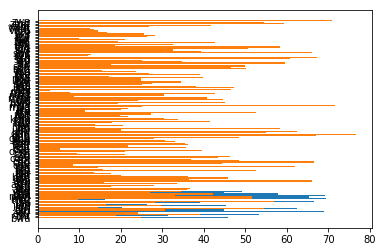

In [27]:
c = before20Years.groupby('geo').mean().reset_index()
d = now.groupby('geo').mean().reset_index()
plt.barh(c['geo'], c['alternative_poverty_percent_below_nationally_defined_poverty'])
plt.barh(d['geo'], d['alternative_poverty_percent_below_nationally_defined_poverty'])

Well from the above plots and summaries we cant say that it might have exactly halved, but yeah for the overlapping countries it is somewhere near half, while the mean percentage of the world has decreased by 1/4. The reason might be missing data for many countries from previous years.

# Problem 2

In [134]:
gdp = pd.read_csv("dataset/ddf--datapoints--alternative_gdp_per_capita_ppp_pwt_8_0--by--geo--time.csv")

In [135]:
countries = gdp['geo'].unique()

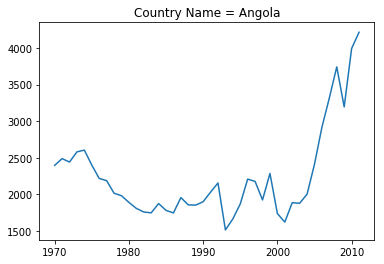

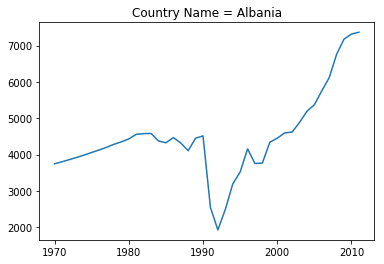

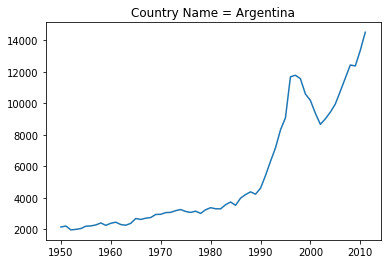

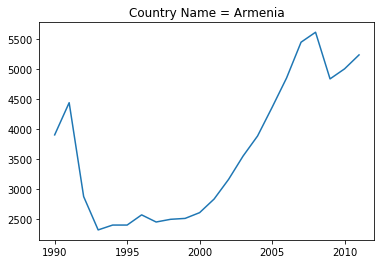

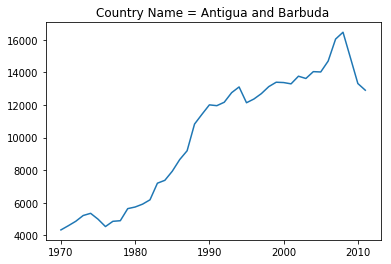

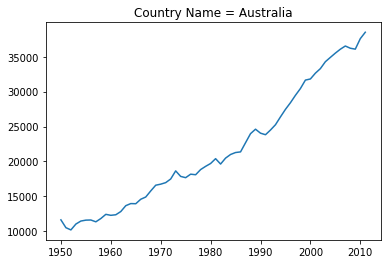

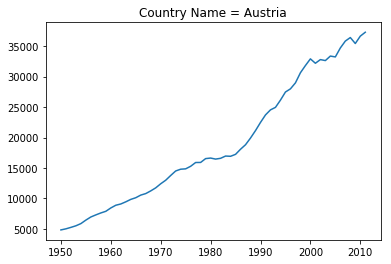

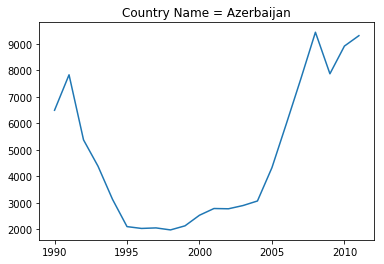

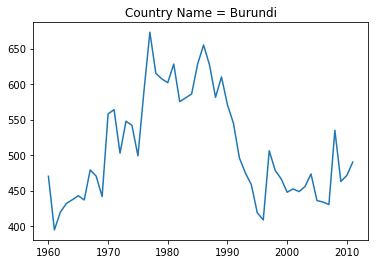

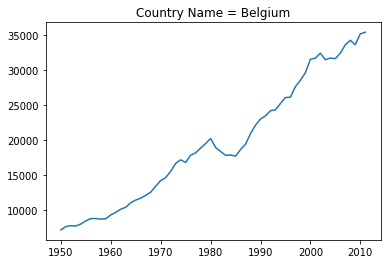

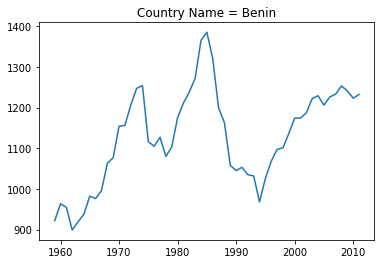

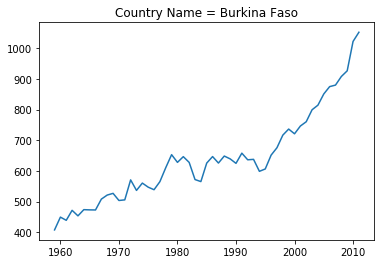

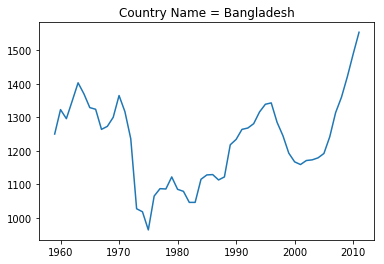

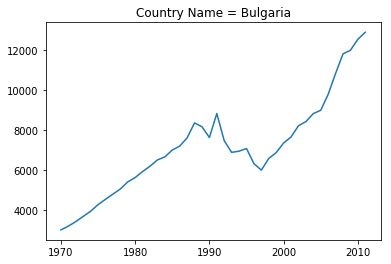

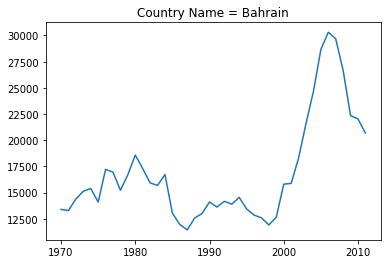

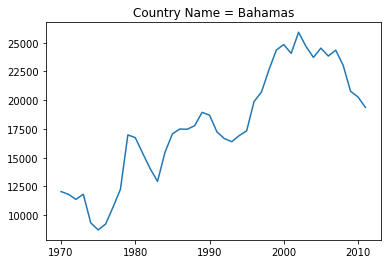

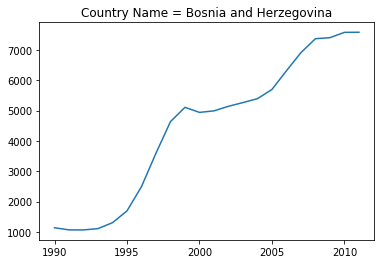

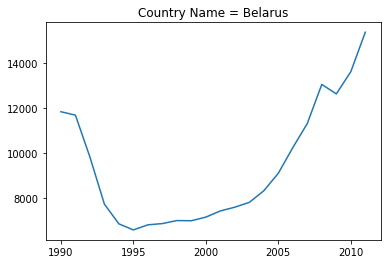

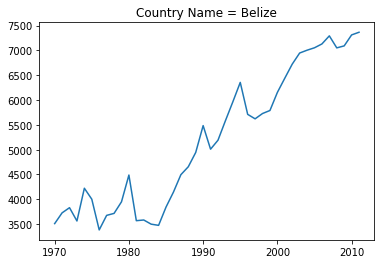

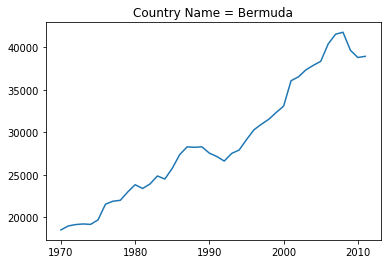

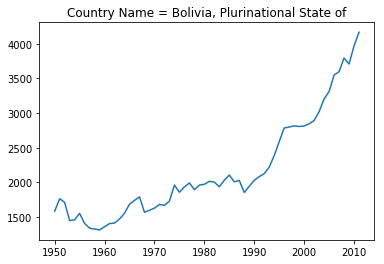

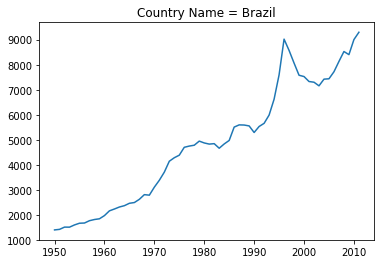

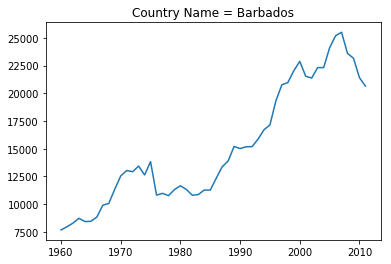

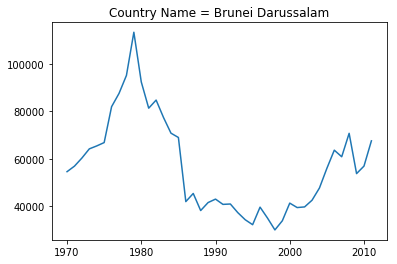

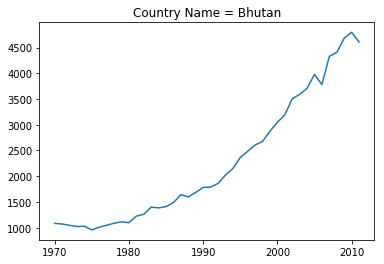

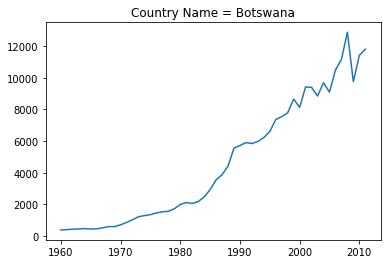

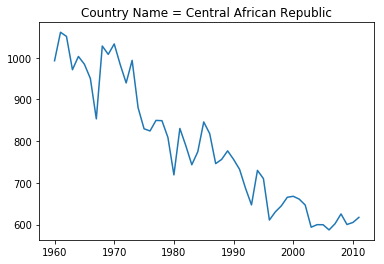

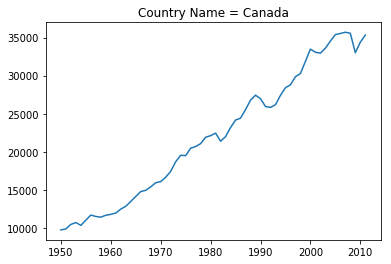

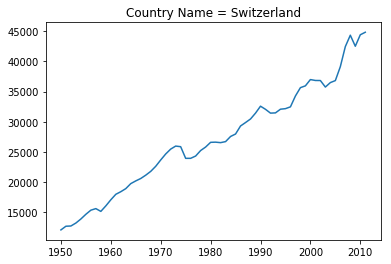

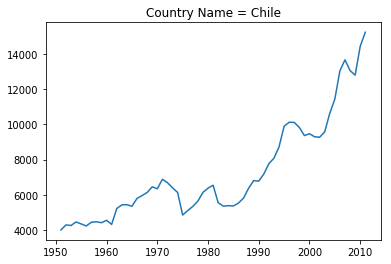

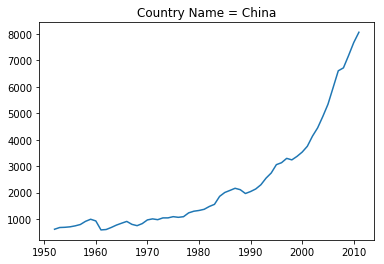

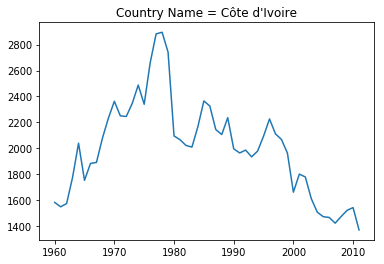

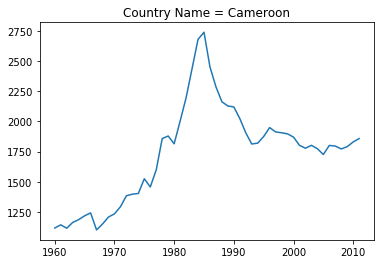

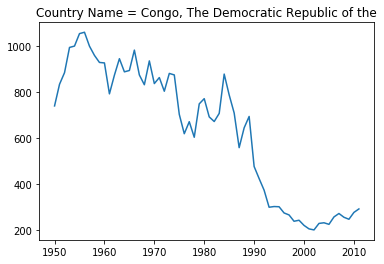

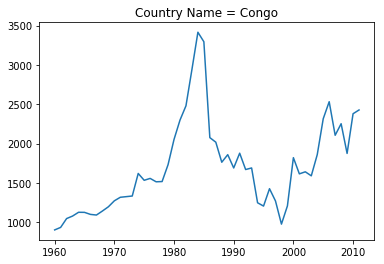

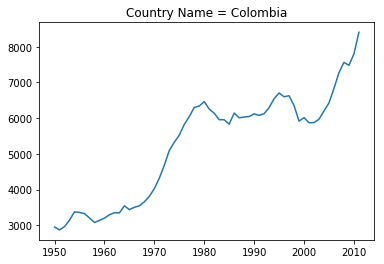

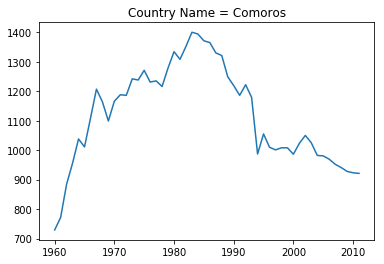

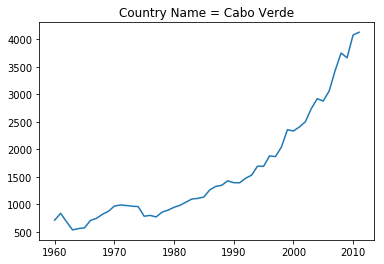

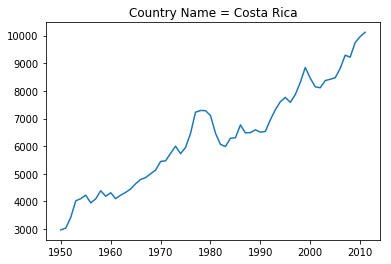

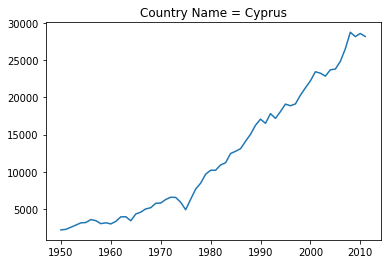

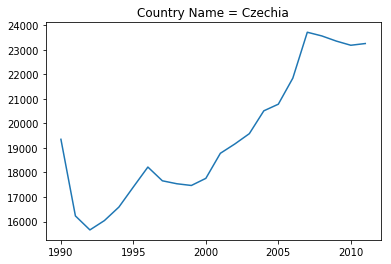

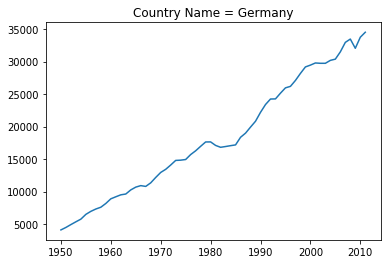

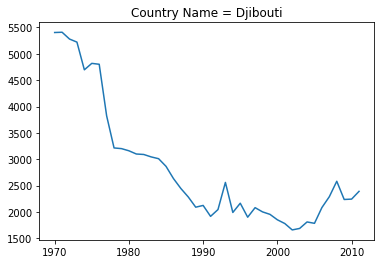

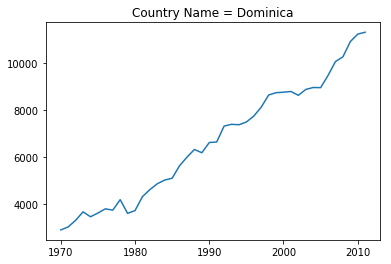

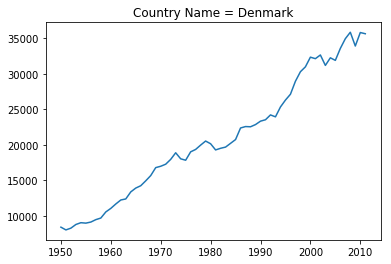

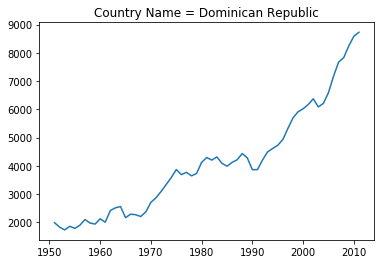

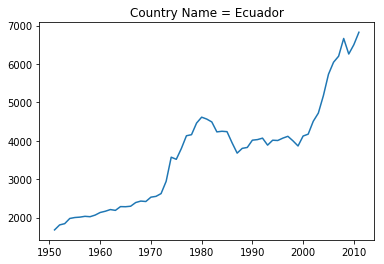

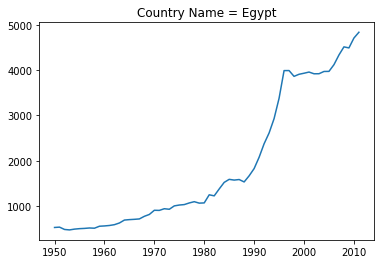

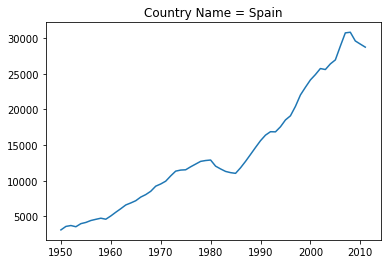

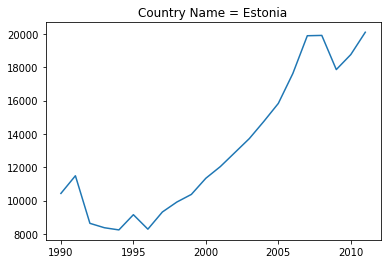

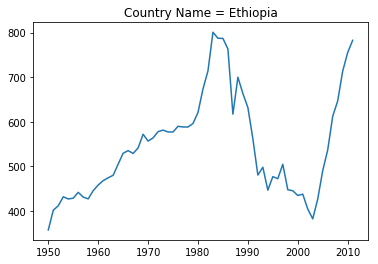

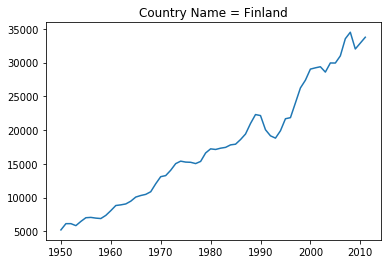

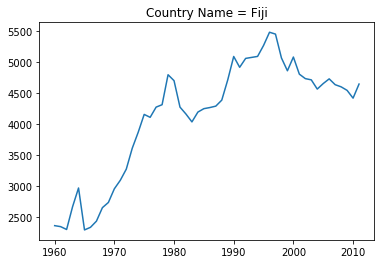

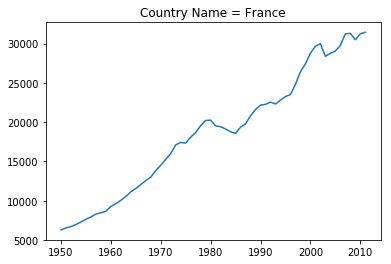

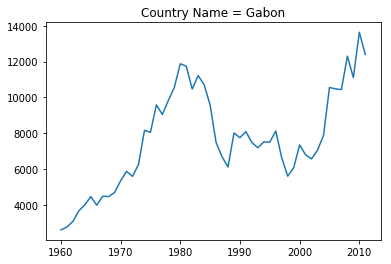

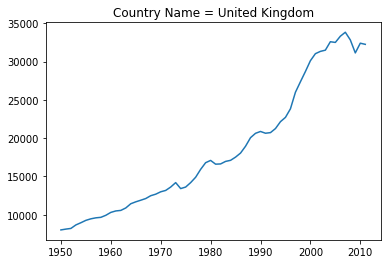

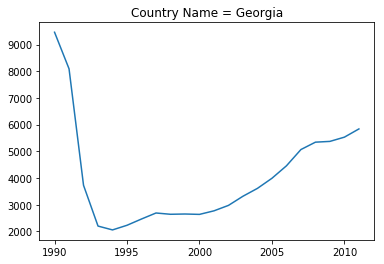

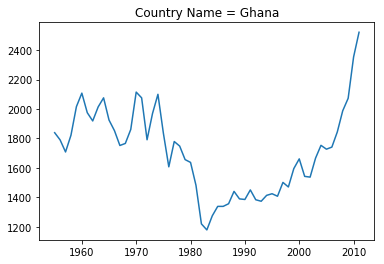

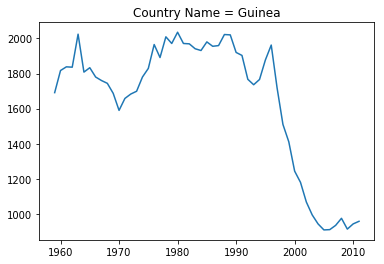

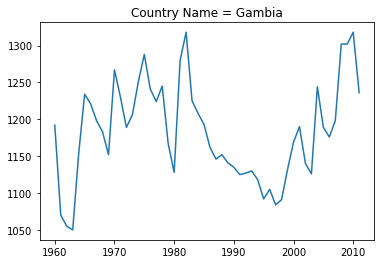

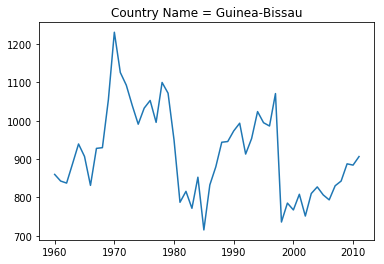

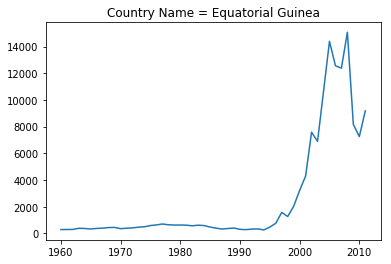

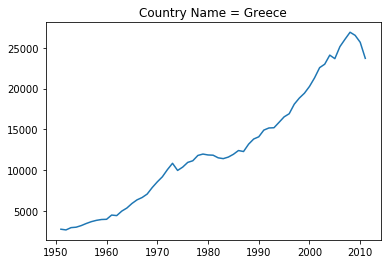

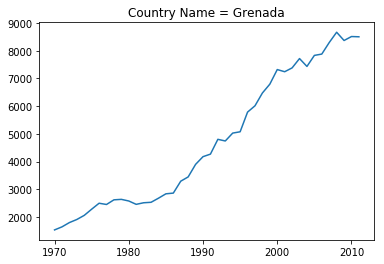

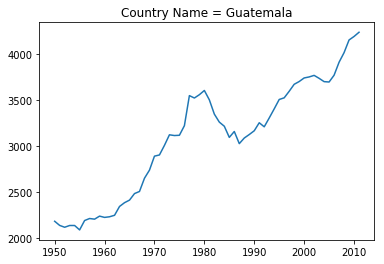

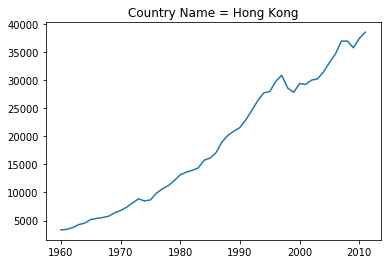

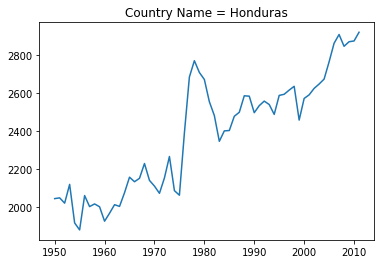

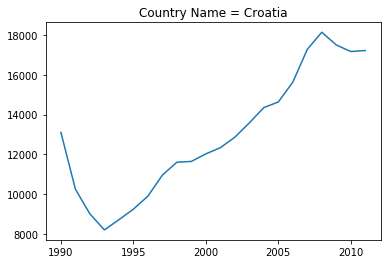

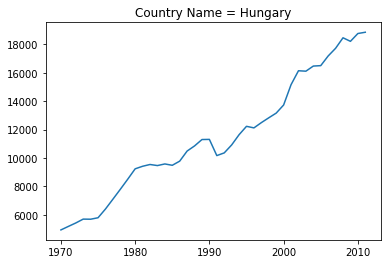

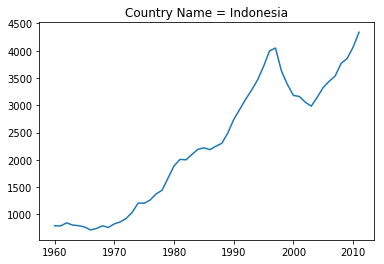

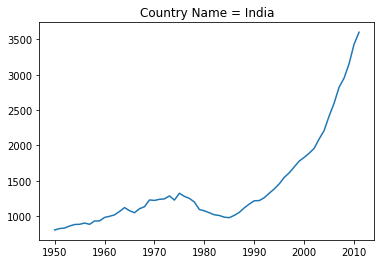

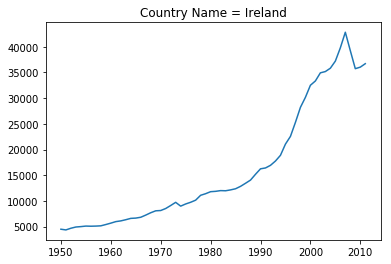

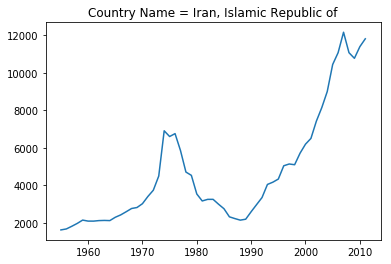

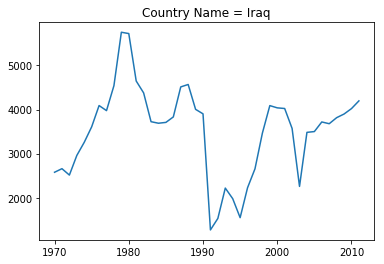

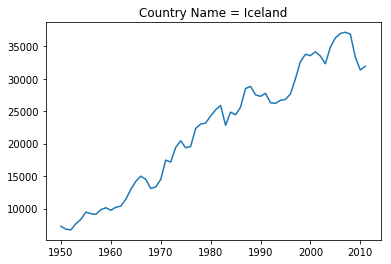

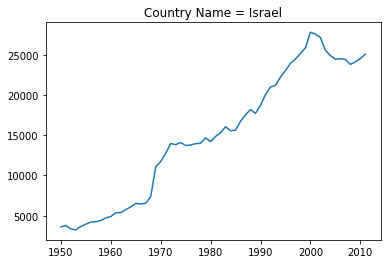

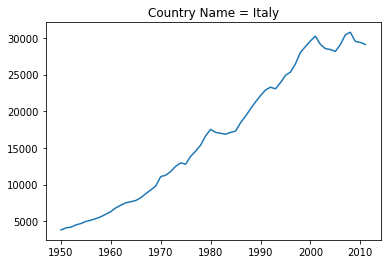

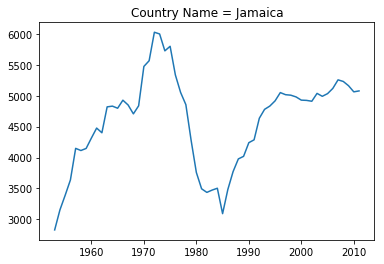

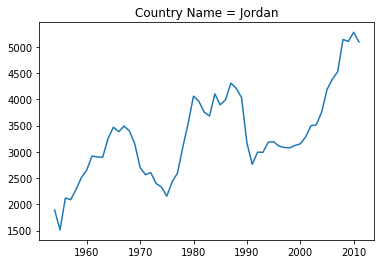

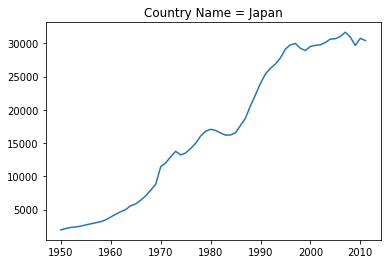

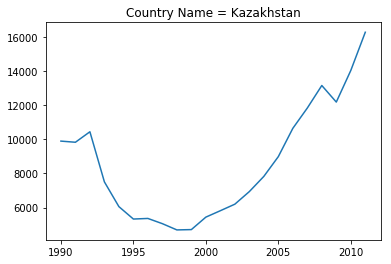

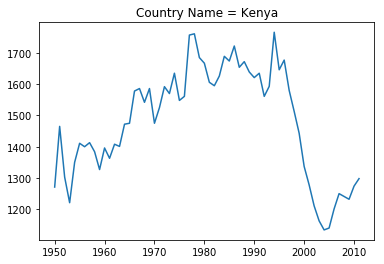

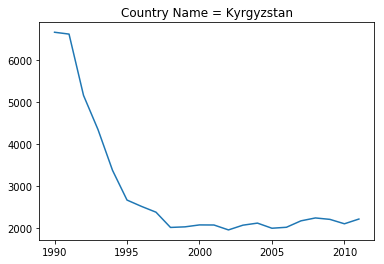

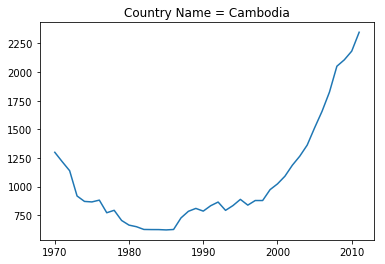

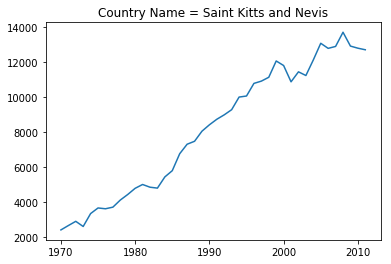

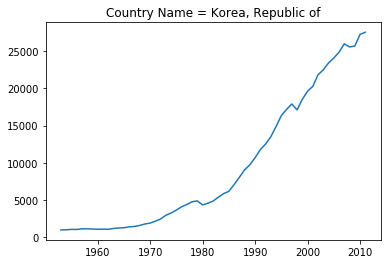

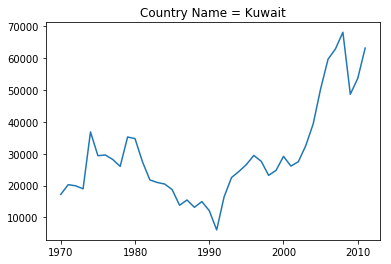

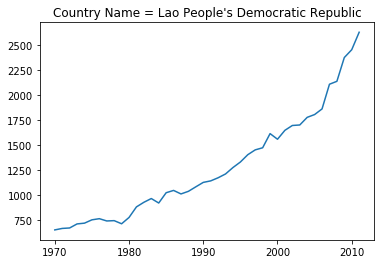

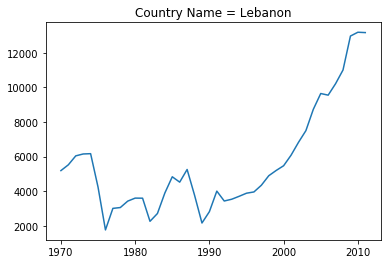

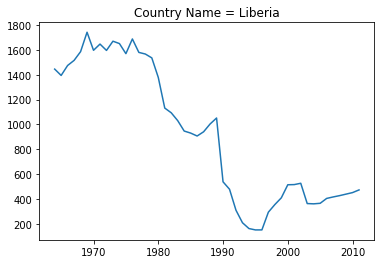

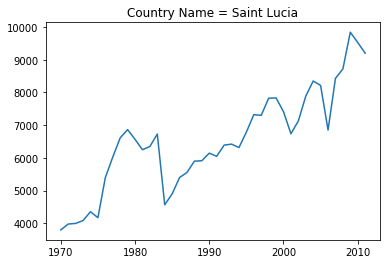

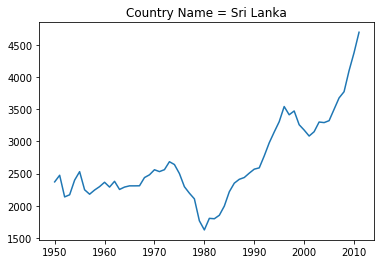

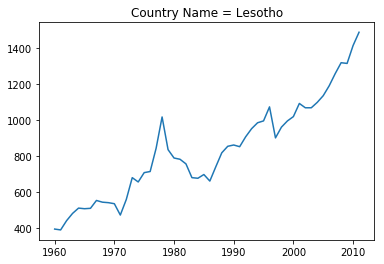

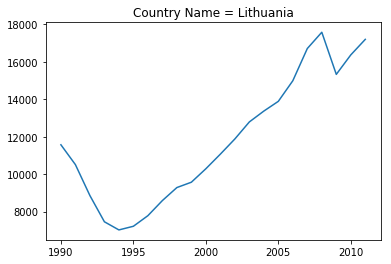

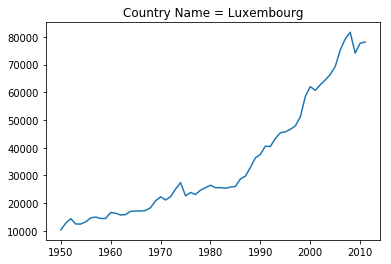

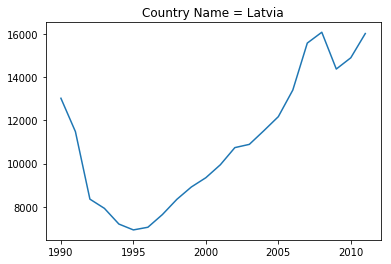

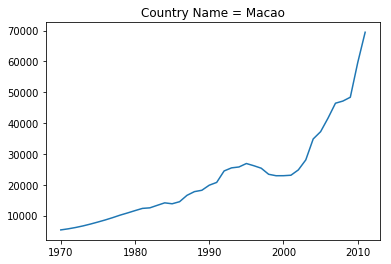

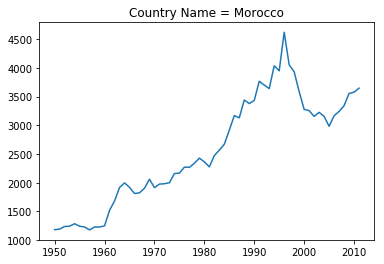

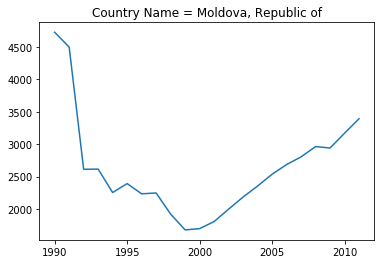

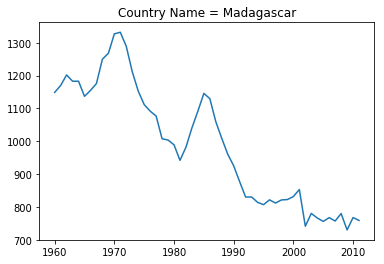

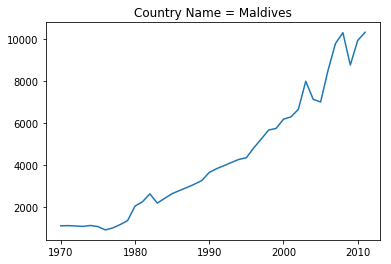

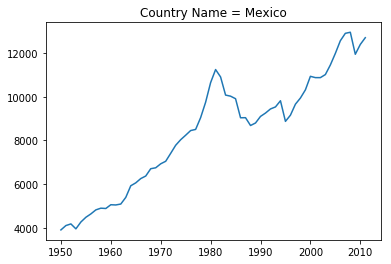

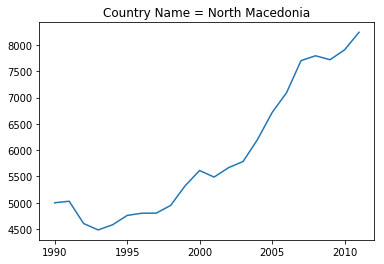

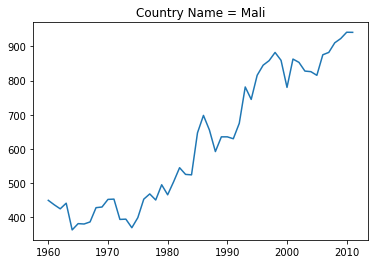

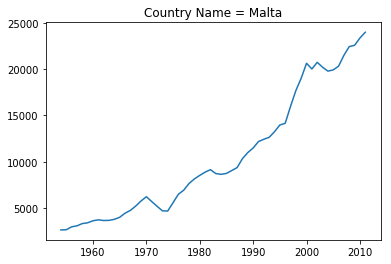

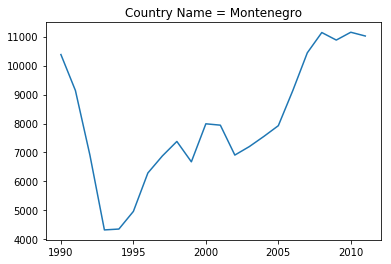

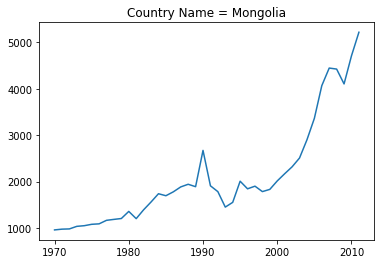

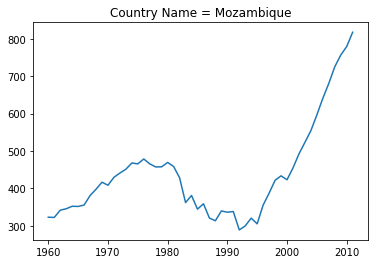

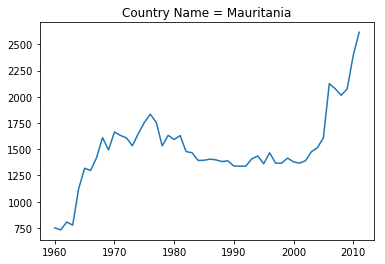

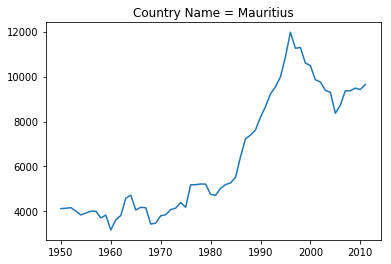

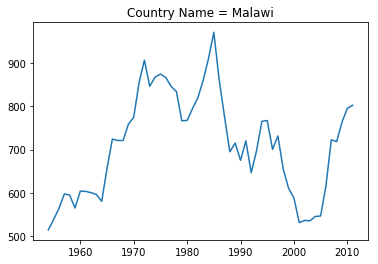

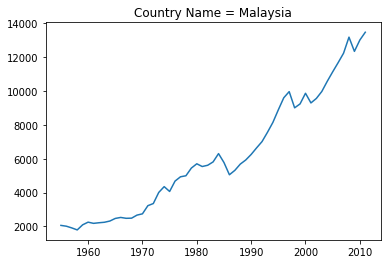

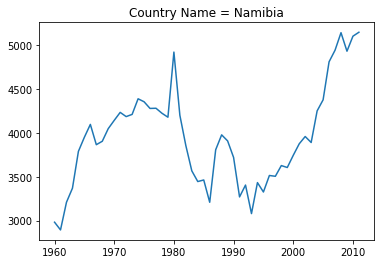

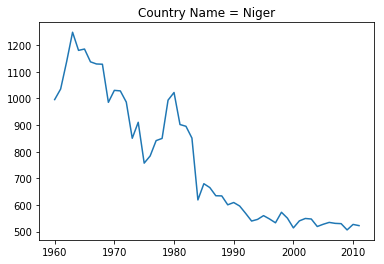

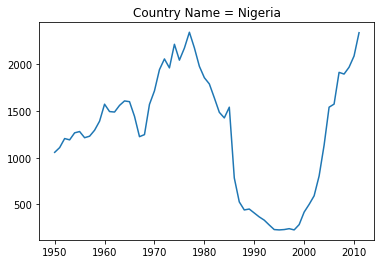

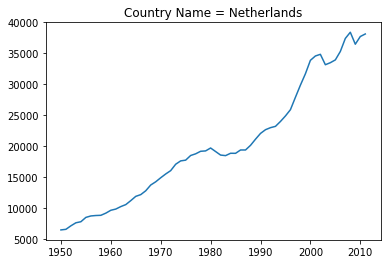

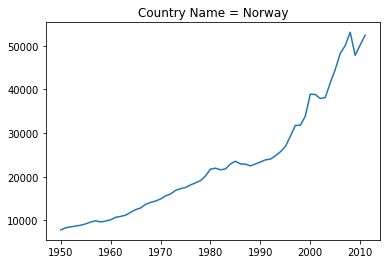

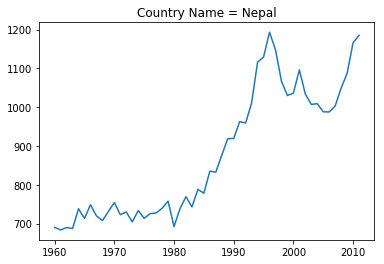

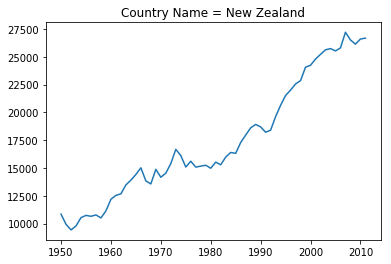

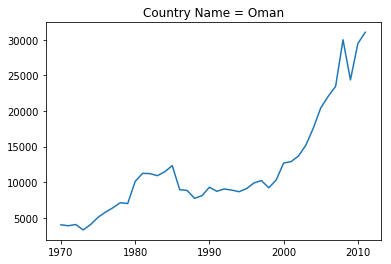

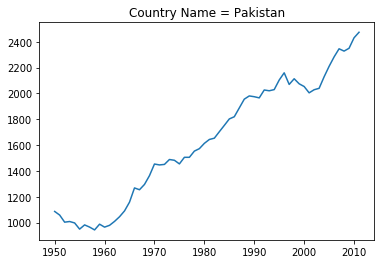

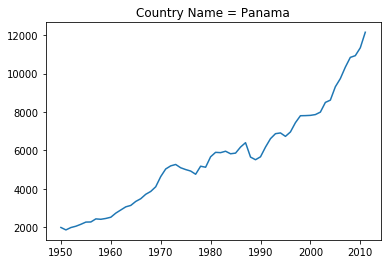

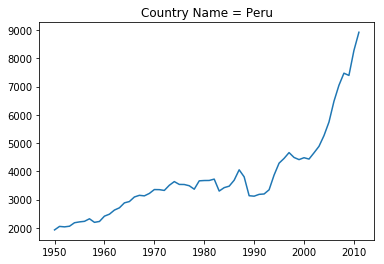

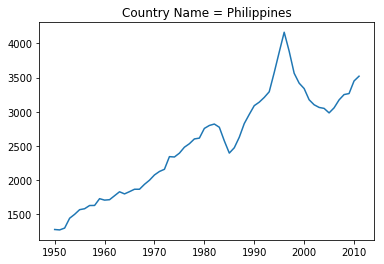

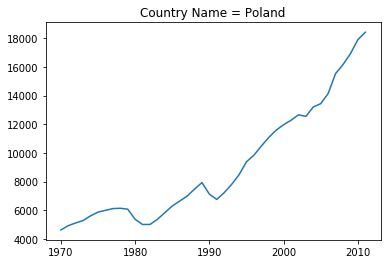

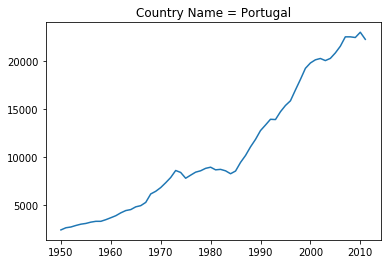

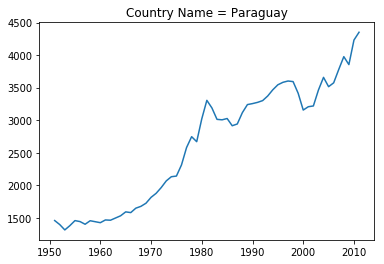

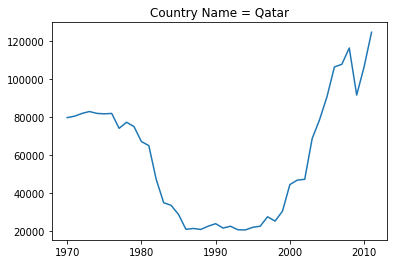

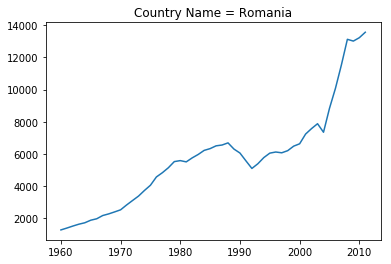

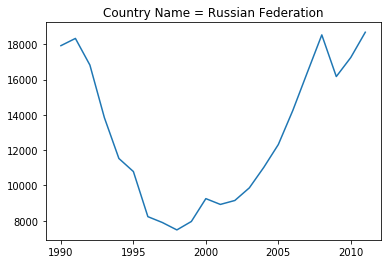

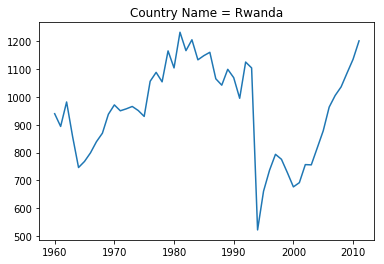

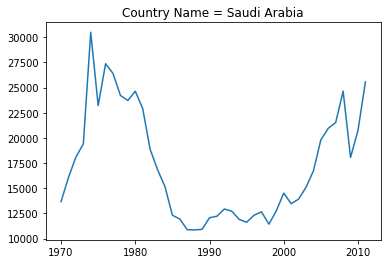

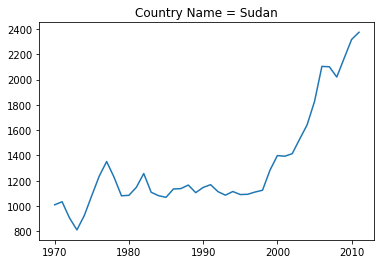

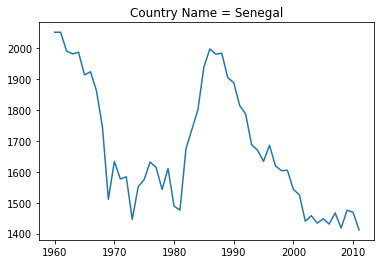

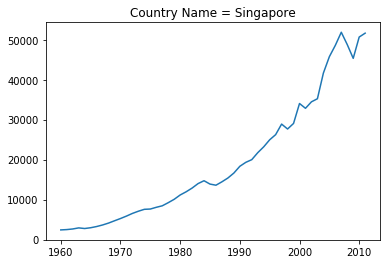

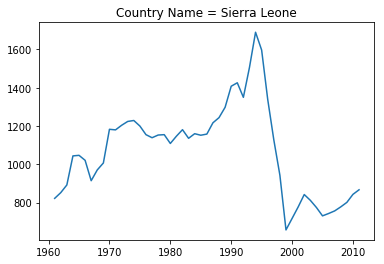

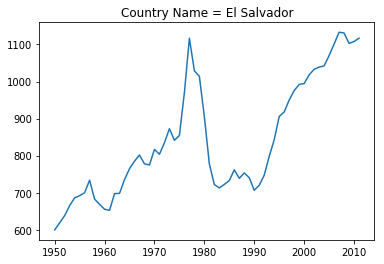

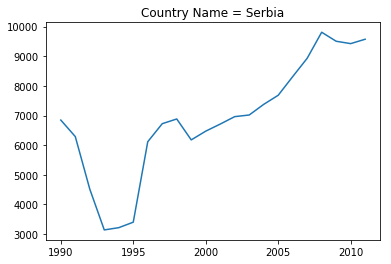

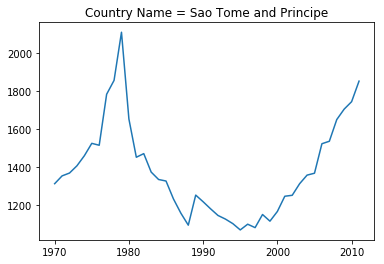

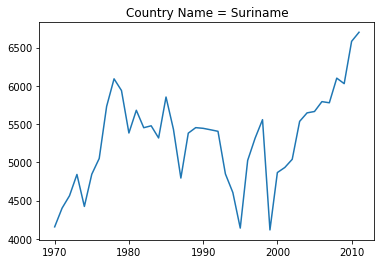

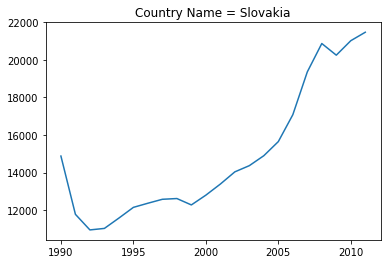

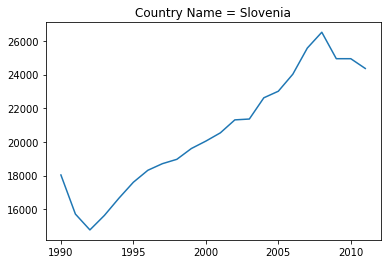

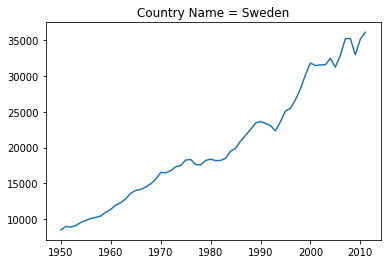

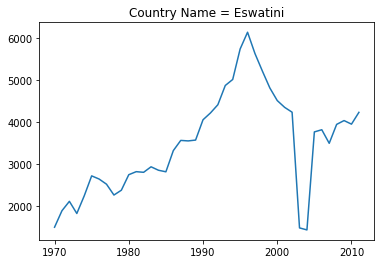

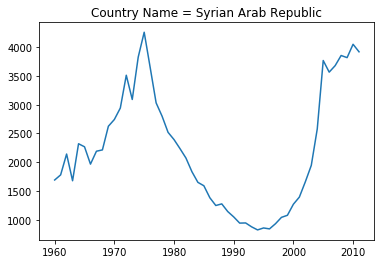

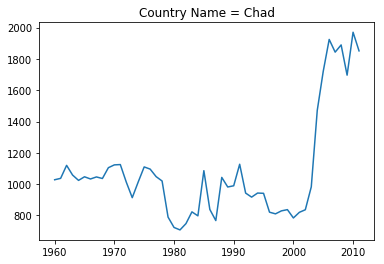

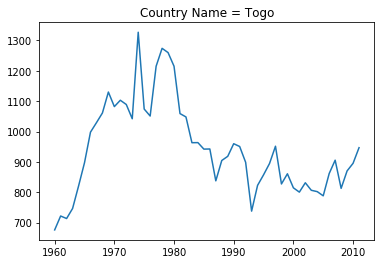

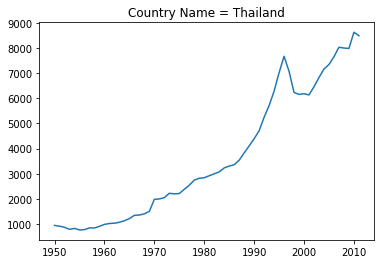

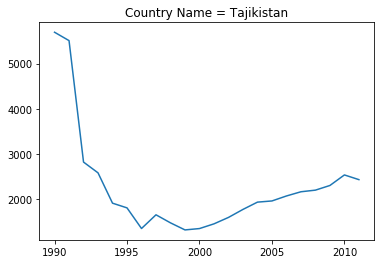

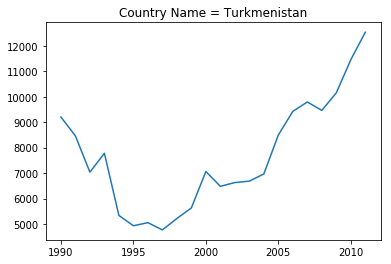

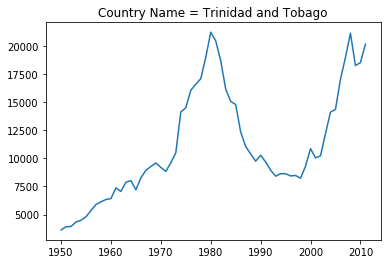

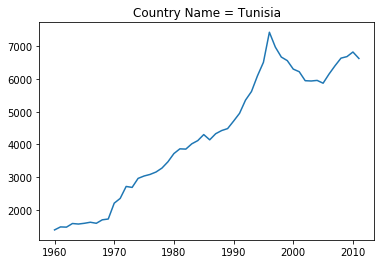

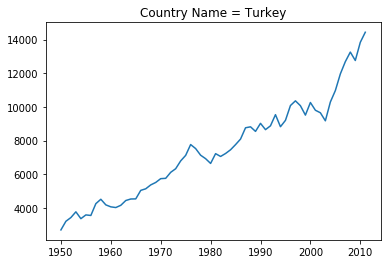

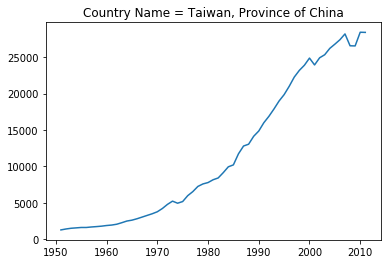

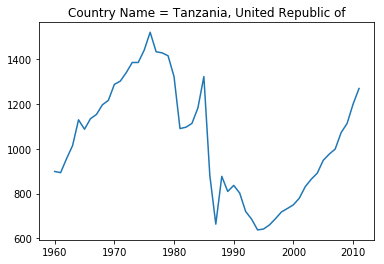

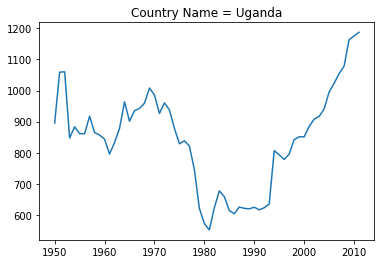

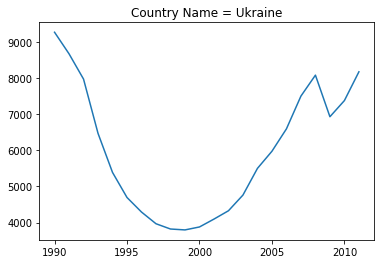

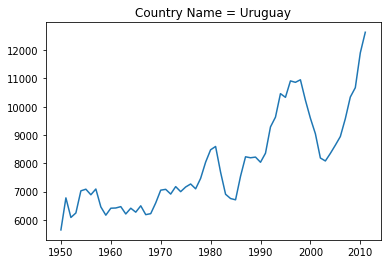

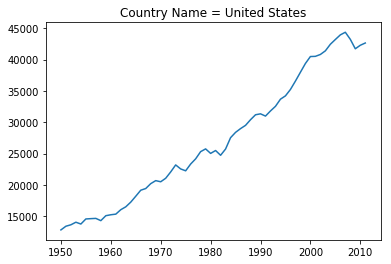

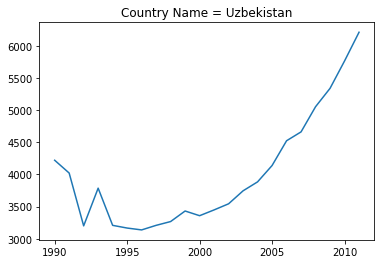

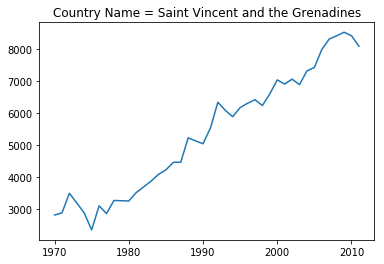

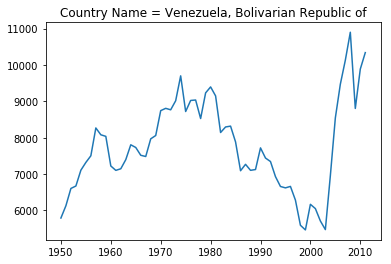

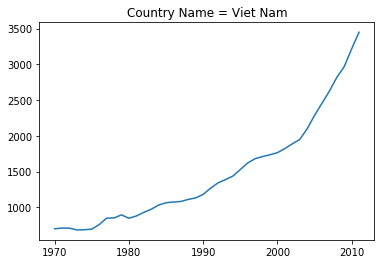

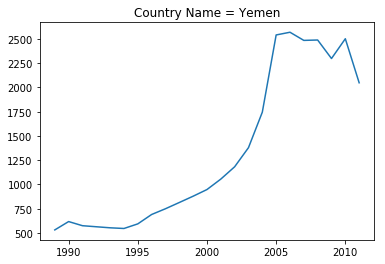

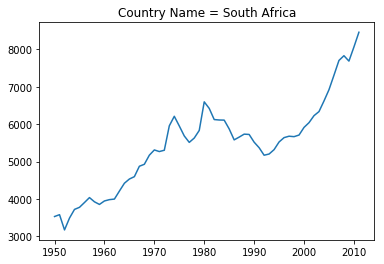

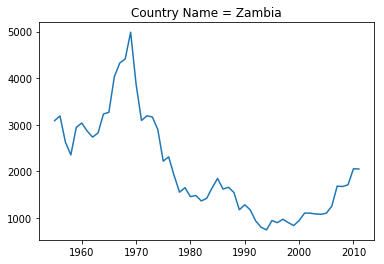

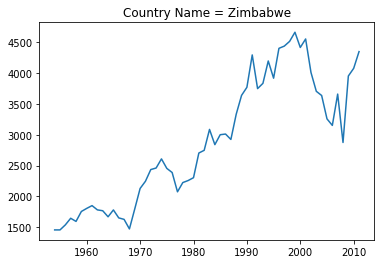

In [136]:
for i in countries:
    j = i
    b = j.upper()
    b = pc.country_alpha3_to_country_alpha2(b)
    b = pc.country_alpha2_to_country_name(b)
    plt.plot(gdp[gdp['geo']==i]['time'], gdp[gdp['geo']==i]['alternative_gdp_per_capita_ppp_pwt_8_0'])
    plt.title("Country Name = "+b)
    plt.show()

In [119]:
for i in countries:
    a = pc.country_alpha3_to_country_alpha2(i.upper())
    gdp = gdp.replace(i, pc.country_alpha2_to_continent_code(a))

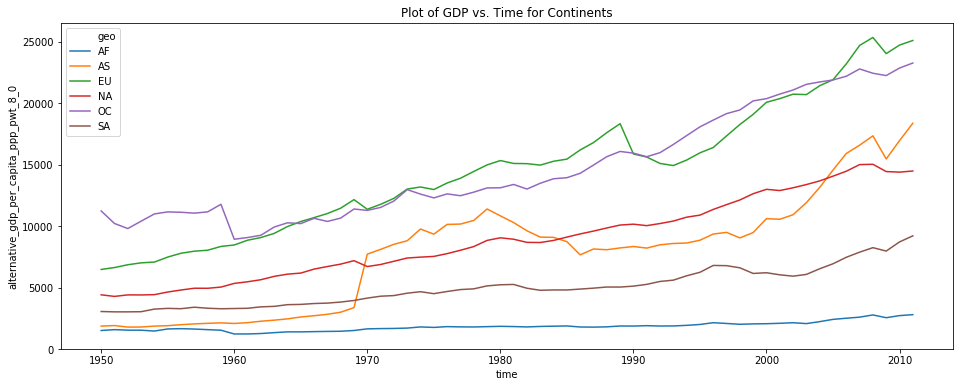

In [125]:
newgdp = gdp.groupby(['geo', 'time']).mean().reset_index()
plt.figure(figsize=(16, 6))
plt.title("Plot of GDP vs. Time for Continents")
sns.lineplot(x=newgdp['time'], y=newgdp['alternative_gdp_per_capita_ppp_pwt_8_0'], hue=newgdp['geo'])

First we see that for each individual country the graph at the end is generally increasing.
The graph for the continent is interesting, because we that the graph for every continent except Africa is increasing. Africa shows a very flat growth in terms of gdp. We see that many continents show a decline between 1980 and 1990 which are EU, OC, AS, NA, SA (shows decline but very little). The GDP sees a steady rise after the 2000's might be because of the integration of computers in everyday life increasing efficiency and possibilities for growth exponentially. In 1970 AS sees a steep rise. Around 1960 OC shows a steep decline, but every country except Africa has a steady rise in their GDP, with EU being the highest.

# Problem 3

In [206]:
life = pd.read_csv("dataset/ddf--datapoints--life_expectancy_at_birth_data_from_ihme--by--geo--time.csv")
child = pd.read_csv("dataset/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv")

In [207]:
life = life[life['geo'] != 'TL']
countries = life['geo'].unique()
for i in countries:
    a = pc.country_alpha3_to_country_alpha2(i.upper())
    if (a == 'TL'):
        life = life[life['geo'] != i]
        continue
    life = life.replace(i, pc.country_alpha2_to_continent_code(a))

In [208]:
child = child[child['geo'] != 'chanisl']
child = child[child['geo'] != 'nld_curacao']
countries = child['geo'].unique()
for i in countries:
    if (i == 'esh' or i == 'tls'):
        child = child[child['geo'] != i]
    a = pc.country_alpha3_to_country_alpha2(i.upper())
    if (a == 'EH' or a == 'TL'):
        child = child[child['geo'] != i]
        continue
    child = child.replace(i, pc.country_alpha2_to_continent_code(a))

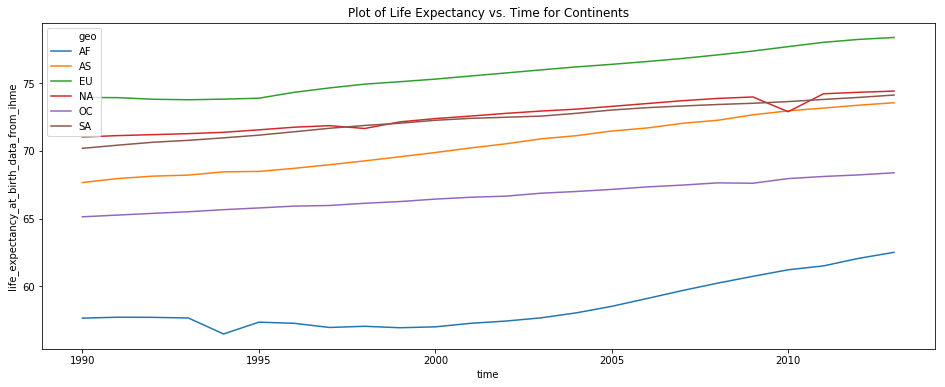

In [209]:
life1 = life.groupby(['geo', 'time']).mean().reset_index()
plt.figure(figsize=(16, 6))
plt.title("Plot of Life Expectancy vs. Time for Continents")
sns.lineplot(x=life1['time'], y=life1['life_expectancy_at_birth_data_from_ihme'], hue=life1['geo'])

Over the years as the GDP of a country increase the life expectency at birth also increases for the same. We see that africa has the lowest life expectancy at birth. All the other continents have significantly greater values than africa. Highest is for EU which is in somewhere around 80's. Very close values for AS, SA, NA. OC is second last in the life expectancy comparison. But all in all life expectancy is going up from the 1990's, the credit can go to the new innovations in medical research, which in turn is because of high GDP, which led to more money being dedicated to biological research field.

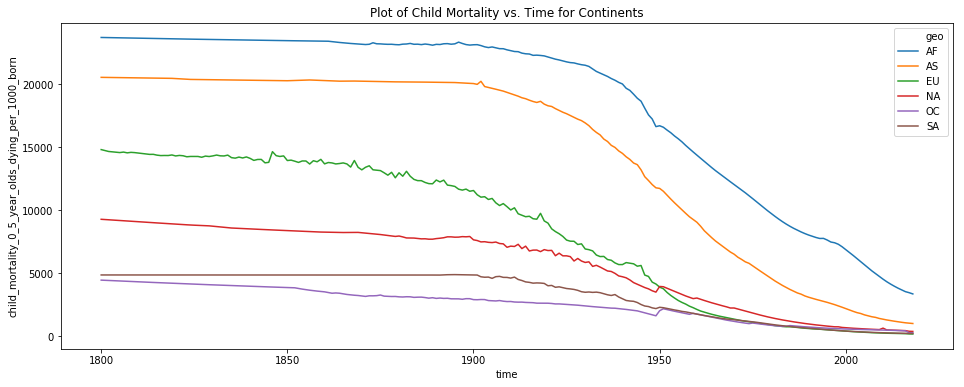

In [210]:
child1 = child.groupby(['geo', 'time']).sum().reset_index()
plt.figure(figsize=(16, 6))
plt.title("Plot of Child Mortality vs. Time for Continents")
sns.lineplot(x=child1['time'], y=child1['child_mortality_0_5_year_olds_dying_per_1000_born'], hue=child1['geo'])

We see that compared to 1800, the child mortality rate has gone down by a lot. Still even now child mortality is highest for AF, which is followed by AS. AS being second in high child mortality maybe because of the high population there in turn leading to lack of resources. It drastically dropped for every continent around 1930, maybe because of the discovery of anti-biotics which revolutionarized the field of medicine, thus leading to fewer deaths. Since then lots of progress has been made in the field of medicine because of the increasing GDP which contributed the field of science and medicine which led to more reasearch and cheaper access to hospitals and medicines.

So all in all we can say that GDP, Child Mortality and Life expectancy are related to each other, as each field complements each other by corelation between money and research.

# Problem 4

In [254]:
comp = pd.read_csv("dataset/ddf--datapoints--personal_computers_per_100_people--by--geo--time.csv")
elect = pd.read_csv("dataset/ddf--datapoints--electricity_use_per_person--by--geo--time.csv")

In [216]:
countries = comp['geo'].unique()
for i in countries:
    a = pc.country_alpha3_to_country_alpha2(i.upper())
    comp = comp.replace(i, pc.country_alpha2_to_continent_code(a))

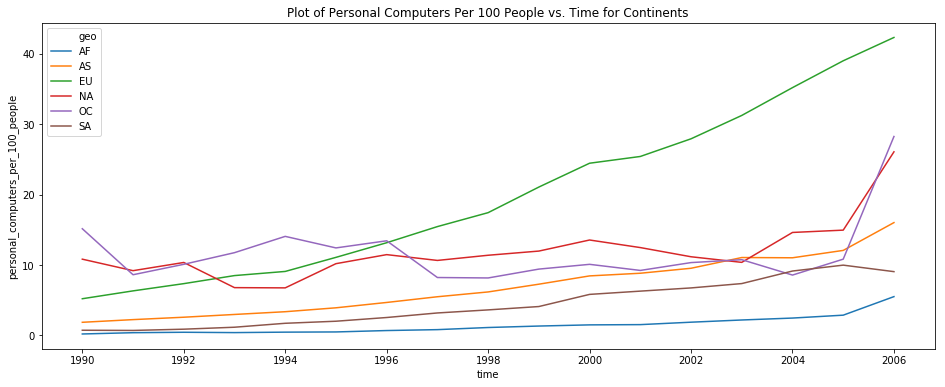

In [219]:
comp1 = comp.groupby(['geo', 'time']).mean().reset_index()
plt.figure(figsize=(16, 6))
plt.title("Plot of Personal Computers Per 100 People vs. Time for Continents")
sns.lineplot(x=comp1['time'], y=comp1['personal_computers_per_100_people'], hue=comp1['geo'])

We see that with time number of personal computers per 100 has increased for every continent. Though for AF the increase is very slow, but for EU the increase is really steep. All the other countries are gradually increasing except NA, which sees a up and down stats for number of computers. We can say the increase of computers is mainly because of people regonizing the importance of PC's and their phenomenal uses and integration with everyday tasks which makes life much more easier and productable.

In [255]:
countries = elect['geo'].unique()
for i in countries:
    if (i == 'ant' or i == 'tls' or i=='kos' or i=='nld_curacao'):
        elect = elect[elect['geo'] != i]
        continue
    a = pc.country_alpha3_to_country_alpha2(i.upper())
    elect = elect.replace(i, pc.country_alpha2_to_continent_code(a))

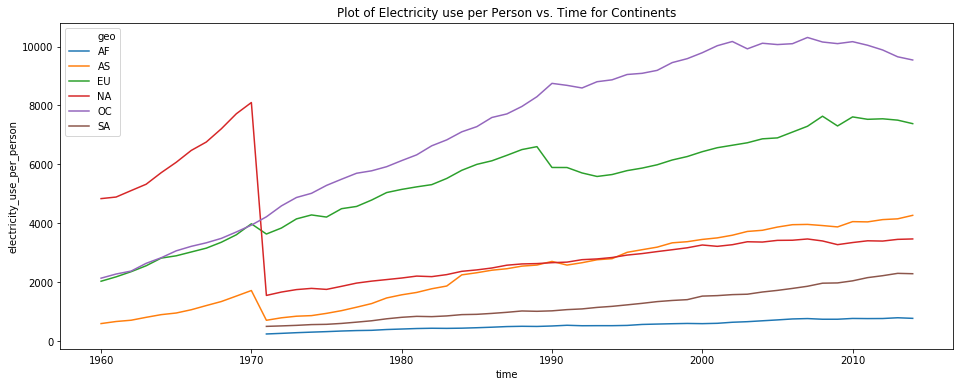

In [258]:
elect1 = elect.groupby(['geo', 'time']).mean().reset_index()
plt.figure(figsize=(16, 6))
plt.title("Plot of Electricity use per Person vs. Time for Continents")
sns.lineplot(x=elect1['time'], y=elect1['electricity_use_per_person'], hue=elect1['geo'])

As we can see that except NA, the use of electricity per person has increased drastically from 1960. This can be credited to invention of computer and smart devices which has led to a constant use of electricity and people life and use of computers in daily life which in turn contributed even more to the use of electricity. As people got more literate they started using smart devices and PC's more, and after the invention of internet, these devices need to be powered 24/7. Suprisingly NA has a decrease of electricity consumption per person, which can be credited to smart use of electricity throughout the continent. AF and SA did not had much increase of electricity which may be due to the less resources and funding.

# Problem 5

I used static plots in my Visualization to see and do analysis of the patterns.

Advantages of using Dynamic Visualisation is that information can be shown to the audience in a much more interactive way. We can show the change of values or numbers over the years or during a duration much more efficiently with the use of animation, where as if we use static visualisation then a person has to manually interpret the changes in the graph by comparing axis. 
But dynamic visualisation would fail if not done efficiently in some cases such as if a change over the years is bizzarre then audience wont be able to capture the real information from a graph, which they may do from a static plot. 
Disadvantage of dynamic visualisation over static is that it uses much more computer memory and processing power than static plots. Dynamic plots are harder and more time consuming to make then static plot. Dynamic plots cant be shown over a paper or a hard copy while a static plot can.
All in all both techniques have their disadvantages and advantages, so it comes down to who are your audience and how much resources you have at hand to make a decision as to which one you should choose.